## Acceleration model (6 Parameters + 3 Extra)

### Data shifting

In [ ]:
A = np.vstack([
    s_x[1:-2],          # s_i(k-1)
    s_x[0:-3],          # s_i(k-2)
    v_x[2:-1],          # v_i(k)
    v_x[1:-2],          # v_i(k-1)
    v_x[3:],            # v_i(k+1)
   -v_x[0:-3]           # -v_i(k-2)
]).T

# Target variable (s(k+1) - s(k))
t= np.array(s_x[3:] - s_x[2:-1])


print("A matrix: " + str(A.shape))
print("target matrix: " + str(np.array(t).shape))


A matrix: (205180, 6)
target matrix: (205180,)


### Normalisation step 
In this section we add the extra rows to achieve 9 parameters

In [ ]:
def add_identity_block(A, B):
    B_zero = np.zeros((len(B), len(A.T)))
    A_zero = np.zeros((len(A), len(B.T)))
    return np.block([
        [A, A_zero], 
        [B_zero, B]])
n = 3               # Number of additional parameters
lambda_val = 0.9
identity_matrix = np.eye(n) * lambda_val
identity_matrix

A_block= add_identity_block(A, identity_matrix)
A_block.shape
target_block = np.concatenate([t, np.zeros(n)])
target_block.shape





(205183,)

### Perform Linear Regression 

Linear regression with (9  parameters
Coefficients:
-0.002315562397921303
-0.002912449034049165
-3.9688630860219947
0.009212242101078913
3.976429722742418
-0.024919960178032
0.013399963197686274
0.01339996319768641
0.013399963197686517
Mean Squared Error: 11.816595567558677
R-squared (R2) Score: 0.34648520415010997


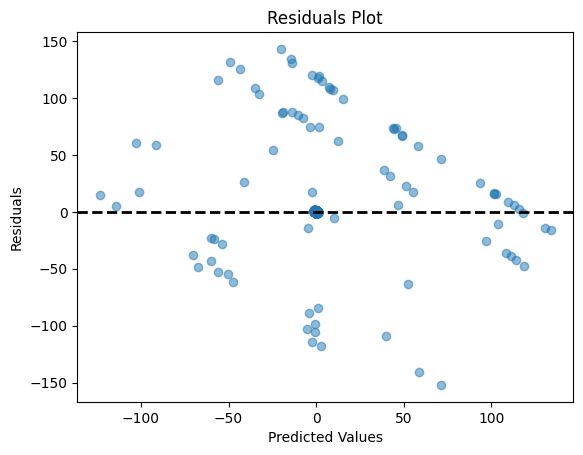

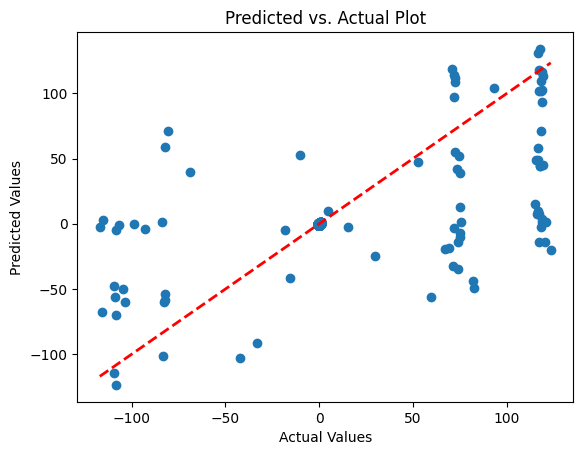

In [ ]:
print("Linear regression with (9  parameters")
perform_linear_regression(A_block, target_block)